## Proyecto ICE

To initiate this analysis, the libraries that may be used during this project are imported. The file is opened, and the necessary information to work with the data is obtained using .info(), .head(), and .shape.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_ice = pd.read_csv('C:\\Users\\CynthiaEL\\Desktop\\TRIPLETEN\\SPRINT 7\\Videogames_Planning\\games.csv')

In [3]:
# The DataFrame and its information are printed
print(df_ice.shape)
print(df_ice.info())
print(df_ice.head())

(16715, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Pla

In [4]:
# Analysis of missing data and duplicates
print(df_ice.isna().sum())
print(df_ice.duplicated().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
0


Through these codes, relevant information for what follows is obtained. There are no duplicated data; the columns "critic_score", "user_score", and "rating" have the highest amount of missing data. Also, "year_of_release" has 269, and "name" and "genre" have 2 missing values each. In the following steps, it will be decided whether to delete, replace, or make no changes.

In [5]:
# Replacing column names with lowercase

df_ice.columns = df_ice.columns.str.lower()

print(df_ice.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
# Converting data to the correct type
 
df_ice['year_of_release'] = df_ice['year_of_release'].astype('Int64')
df_ice['user_score'] = pd.to_numeric(df_ice['user_score'], errors = 'coerce')

df_ice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Some changes were made in this part of the project: all column names were changed to lowercase, and "year_of_release" was transformed from float to integer, since as a year, it does not make sense to have decimals. It must be noted that it contains NaN values, so .astype(Int64) was used. Also, "user_score" was transformed from object to float using pd.to_numeric.

In [7]:
# Treatment of missing text data
str_cols = ['name', 'genre', 'rating']
df_ice[str_cols] = df_ice[str_cols].fillna('unknown')

In [8]:
# Verifying if the data has been replaced

df_ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In the previous steps, the missing data found in the dataframe were analyzed; it was decided to leave the numerical data in the "critic_score" and "user_score" columns as missing. Due to the large number of missing values, we want to avoid bias in the following analyses and results. Text data were replaced with the word "unknown". Through .info(), it is confirmed that the data has been replaced and is ready to be worked with.

In [9]:
# Total sales are calculated for each game

df_ice['total_sales'] = df_ice['na_sales']+ df_ice['eu_sales'] + df_ice['jp_sales'] + df_ice['other_sales']

print(df_ice['total_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64


In [10]:
# The number of games released in different years is calculated

games_since_2007 = df_ice[df_ice['year_of_release']>=2007]
games_per_year = games_since_2007.groupby('year_of_release')['name'].count()

print(games_per_year)

year_of_release
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


The number of games released in different years is calculated, but not all years are needed. Data from 2007 is taken, covering the last 10 years for the 2017 forecast. A downward trend in game releases is noted as years increase; in 2008, 1,427 were released, unlike 2016, which only had 502, almost a third. This data is analyzed further ahead.

In [14]:
# Total sales for each platform are calculated taking the year into account
total_sales_year_platform = games_since_2007.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending=False)
print((total_sales_year_platform).head(10))

print()

# Total sales for each platform are calculated
total_sales_platform = games_since_2007.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print((total_sales_platform).head(5))

platform  year_of_release
Wii       2009               206.97
          2008               171.32
X360      2010               170.03
PS3       2011               156.78
Wii       2007               152.77
DS        2007               146.94
          2008               145.31
X360      2011               143.84
PS3       2010               142.17
X360      2008               135.26
Name: total_sales, dtype: float64

platform
PS3     910.38
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
Name: total_sales, dtype: float64


According to the results obtained after calculating total sales by platform and by year, a top list of the best-sellers can be made: Wii, X360, PS3, DS. On the other hand, if we check the best-sellers based on total sales and not by year, they would be PS3, X360, Wii, DS, PS4. This can be better visualized in a chart.

platform           3DS    DC      DS  GBA    GC     PC    PS2     PS3     PS4  \
year_of_release                                                                 
2007               NaN  0.02  146.94  3.4  0.27   9.28  75.99   73.19     NaN   
2008               NaN  0.04  145.31  NaN   NaN  12.42  53.90  118.52     NaN   
2009               NaN   NaN  119.54  NaN   NaN  16.91  26.40  130.93     NaN   
2010               NaN   NaN   85.02  NaN   NaN  24.28   5.64  142.17     NaN   
2011             63.20   NaN   26.18  NaN   NaN  35.03   0.45  156.78     NaN   
2012             51.36   NaN   11.01  NaN   NaN  23.22    NaN  107.36     NaN   
2013             56.57   NaN    1.54  NaN   NaN  12.38    NaN  113.25   25.99   
2014             43.76   NaN     NaN  NaN   NaN  13.28    NaN   47.76  100.00   
2015             27.78   NaN     NaN  NaN   NaN   8.52    NaN   16.82  118.90   
2016             15.14   NaN     NaN  NaN   NaN   5.25    NaN    3.60   69.25   

platform           PSP    P

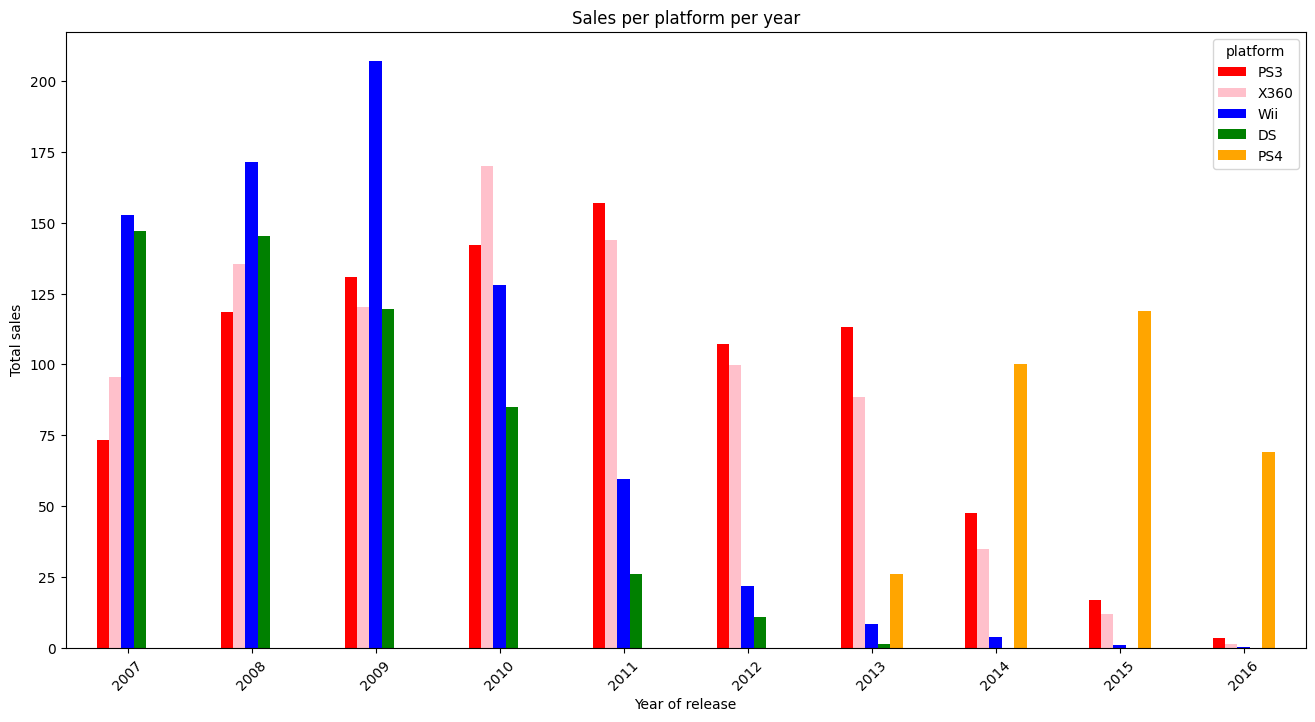

In [15]:
# A dynamic table or pivot table is created to generate the chart

pivot_table = games_since_2007.pivot_table(index= 'year_of_release', columns='platform', values='total_sales', aggfunc='sum')

print(pivot_table)

sales_by_platform = pivot_table.sum().sort_values(ascending=False)
top_5_columns = sales_by_platform.head(5).index
pivot_table_top = pivot_table[top_5_columns]

colors=['red', 'pink', 'blue', 'green', 'orange']
pivot_table_top.plot(title='Sales per platform per year', kind='bar', color=colors, figsize=[16,8], xlabel='Year of release', ylabel='Total sales', rot=45)
plt.show()

In the chart, it can be observed that PS3 has sustained growth between 2007-2011, from approximately 75 to 160 million in sales. It shows a gradual decline between 2012 and 2016, dropping to 10 million. This is likely due to the launch of the PS4 in 2013.

Next, Xbox 360 remains stable between 2007 and 2016, with a peak in 2010 of around 170 million, and a constant decline since 2011. it stays in competition with PS3.

Then there is the Wii, which saw sales skyrocket between 2007 and 2009, reaching over 200 million in 2009. After this, its decline begins, becoming very pronounced since 2010. It has a shorter life cycle compared to the other two platforms but is successful in sales.

Continuing with the DS, it shows stability between 2007-2008 with approximately 46 million in sales, which began to decrease in 2009 and is no longer seen in metrics as of 2013. This is likely due to the launch of a new platform.

Finally, there is the PS4; its launch appears to be in 2013, from which point data is available, taking off with more than 25 million. It shows growth until 2015 with almost 120 million. It remains strong in the market between 2015 and 2016, where a slight decrease is seen.

To answer the question, how long does it generally take for new platforms to appear and old ones to fade? Platforms show a typical cycle of more or less 8 years generating revenue. There are about 4-5 active platforms simultaneously competing in the market.

C:\Users\CynthiaEL\AppData\Local\Temp\ipykernel_14796\3633714956.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_top5, x = 'platform', y = 'total_sales', palette=['blue', 'orange', 'green', 'red', 'purple'])


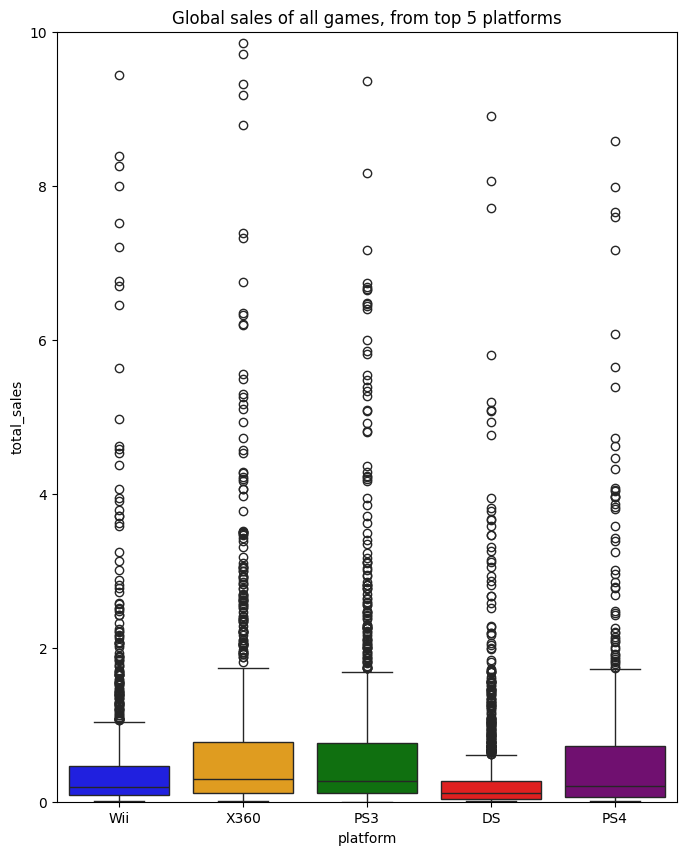

In [17]:
# A box plot is created for global game sales and by platform

top_5_platforms = ['PS3', 'X360', 'Wii', 'DS', 'PS4']

df_top5 = games_since_2007[games_since_2007['platform'].isin(top_5_platforms)]
plt.figure(figsize = (8, 10))
sns.boxplot(data = df_top5, x = 'platform', y = 'total_sales', palette=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Global sales of all games, from top 5 platforms')
plt.ylim(0, 10)
plt.show()

Answering the questions: Yes, there are significant differences in sales between platforms. Wii shows the greatest variability, with sales in the 0-10 million range. PS3 and X360 show similar distribution patterns, with close medians but different ranges of outliers. DS and PS4 have more compact distributions and slightly lower medians. On the other hand, regarding average sales across different platforms, the medians for all platforms are very close to 0; none reach approximately 0.5 million. This indicates that most games on all platforms have low sales; successful games are exceptions, not the rule. 50% of the data is concentrated between approximately 0 and 2 million for most platforms.

All platforms, within the (0-10 million) range, present numerous outliers; these represent exceptionally successful games, where Wii has the highest outliers, some reaching 10 million.

The correlation between Wii's total sales and user scores is, 0.11241436067003177



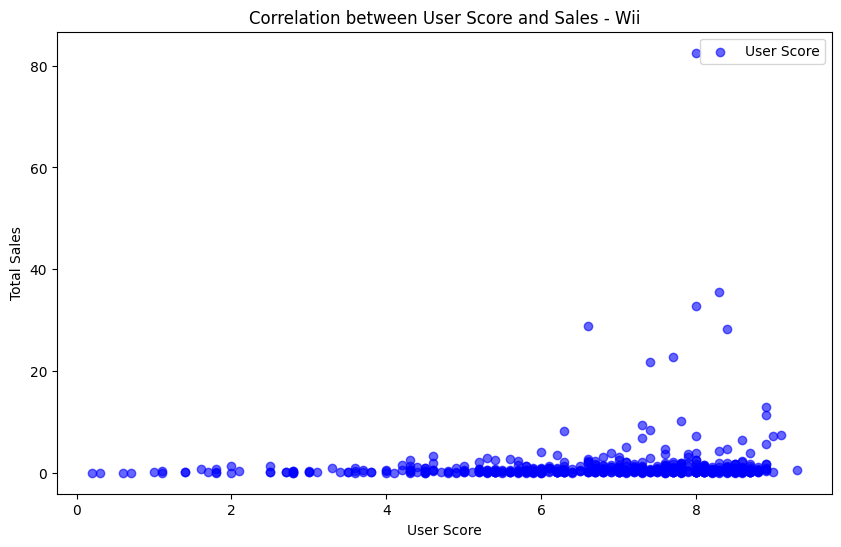

In [22]:
# Correlation of reviews and sales for Wii is analyzed

wii_platform = df_ice[df_ice['platform']== 'Wii']

corr_user_sales = wii_platform['user_score'].corr(wii_platform['total_sales'])
print(f"The correlation between Wii's total sales and user scores is, {corr_user_sales}")

print()
# A scatter plot is created for user score and sales
plt.figure(figsize=(10, 6))
plt.scatter(wii_platform['user_score'], wii_platform['total_sales'], 
           alpha=0.6, label='User Score', color='blue')


plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Correlation between User Score and Sales - Wii')
plt.legend()
plt.show()



The correlation between Wii's total sales and critic scores is, 0.17755988806089953



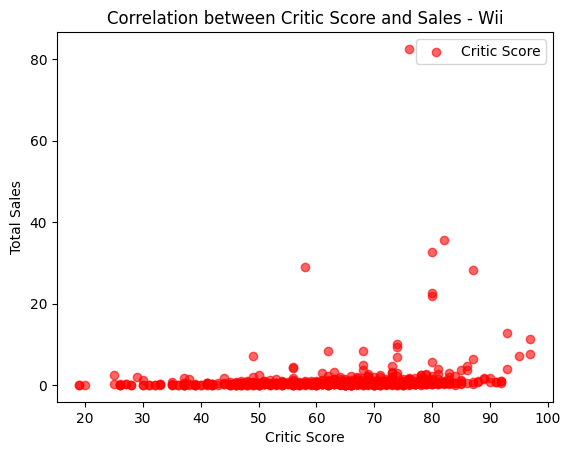

In [20]:
# A scatter plot is created for critic score and sales

corr_critic_sales = wii_platform['critic_score'].corr(wii_platform['total_sales'])
print(f"The correlation between Wii's total sales and critic scores is, {corr_critic_sales}")

print()
plt.scatter(wii_platform['critic_score'], wii_platform['total_sales'], 
           alpha=0.6, label='Critic Score', color='red')

plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Correlation between Critic Score and Sales - Wii')
plt.legend()
plt.show()

Analysis of both charts
It is observed in the chart that for User Score, sales are concentrated between 0-20 million and are compressed within a narrow range. There are few outliers reaching more than 80 million. For Critic Score, sales are also concentrated below 20 million, but the scores extend more broadly between 20 and 100. It also presents slightly more dispersed outliers. The charts show a weak correlation; both graphs show that there is no strong correlation between high scores and high sales. The best-selling games are not necessarily the highest-rated. The scales are different: User Score ranges from 0-10, while Critic Score ranges from 0-100.

Correlation Coefficient
The correlation coefficient between Wii's total sales and user scores is 0.11241436067003163. This is a very weak positive correlation; there is no strong relationship between scores and the platform's sales. Other factors have a greater impact on game sales.

The correlation coefficient between Wii's total sales and critic scores is 0.17755988806089956. This is a weak positive correlation; there is no strong relationship between scores and the platform's sales. Other factors have a greater impact on game sales.

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
unknown            2.42
Name: total_sales, dtype: float64


<Axes: title={'center': 'Total Sales by Genre'}, xlabel='Genre', ylabel='Total Sales'>

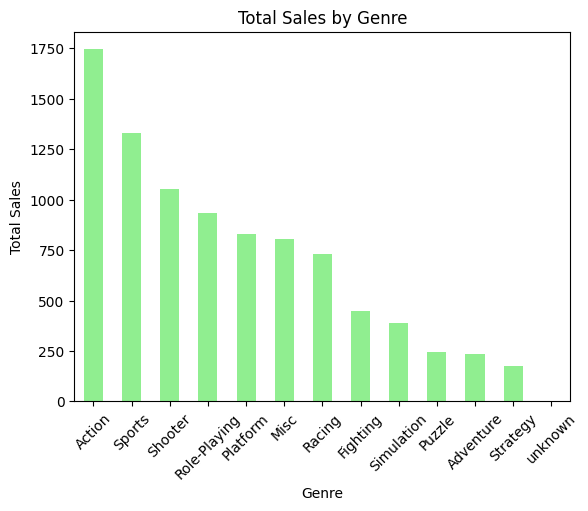

In [23]:
# The distribution of games based on their total sales is analyzed

sales_by_genre = df_ice.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print(sales_by_genre)

sales_by_genre.plot(title='Total Sales by Genre', kind = 'bar', color = 'lightgreen', rot = 45, xlabel = 'Genre', ylabel = 'Total Sales')

It is clearly seen in the chart that the most profitable genres are Action with 1,744.17 million, Sports with 1,331.27 million, and Shooter with 1,052.45 million in sales. The lowest are Puzzle, Adventure, and Strategy. It can be inferred that the most profitable games are those of immediate action and movement, where players simply act without thinking. Less profitability is seen in games that require stopping to think and analyze to continue or reach a solution or goal.

In [24]:
# A user profile for each region based on sales will be created

na_plataformas = df_ice.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print(f"The total sales of North America in their top 5 platforms are: {na_plataformas}")
print()
eu_plataformas = df_ice.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(f"The total sales of Europe in their top 5 platforms are: {eu_plataformas}")
print() 
jp_plataformas = df_ice.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(f"The total sales of Japan in their top 5 platforms are: {jp_plataformas}")

The total sales of North America in their top 5 platforms are: platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

The total sales of Europe in their top 5 platforms are: platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

The total sales of Japan in their top 5 platforms are: platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [25]:
# A user profile for each region based on genre will be created

na_plataformas = df_ice.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print(f"The 5 main genres of North America are: {na_plataformas}")
print()
eu_plataformas = df_ice.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(f"The 5 main genres of Europe are: {eu_plataformas}")
print() 
jp_plataformas = df_ice.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(f"The 5 main genres of Japan are: {jp_plataformas}")

The 5 main genres of North America are: genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

The 5 main genres of Europe are: genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

The 5 main genres of Japan are: genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [26]:
# A user profile for each region based on their rating will be created

df_rating_conocido = df_ice[df_ice['rating'] != 'unknown']

na_plataformas = df_rating_conocido.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
print(f"The 5 main ratings of North America are: {na_plataformas}")
print()
eu_plataformas = df_rating_conocido.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(f"The 5 main ratings of Europe are: {eu_plataformas}")
print() 
jp_plataformas = df_rating_conocido.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(f"The 5 main ratings of Japan are: {jp_plataformas}")

The 5 main ratings of North America are: rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64

The 5 main ratings of Europe are: rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
Name: eu_sales, dtype: float64

The 5 main ratings of Japan are: rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64


Upon first conducting this analysis, it was observed that part of the top 5 included an 'unknown' rating; therefore, to provide an answer regarding whether ratings affect sales in different regions, the data was filtered to obtain only known values. Now, the rating data for each region is obtained.

### Similarity in Preferences:
After the regional analysis, the following can be concluded: The first 4 classifications are identical in all 3 regions: E, T, M, E10+. JP and NA have exactly the same top 5, with only EU differing in the 5th position (K-A vs others).

Regarding differences in sales volume, North America dominates the market, with its E rating at 1,292 million; overall, all classifications have a higher volume compared to Europe and Japan.

Europe, in second place, has an E rating of 710 million, and Japan, with the lowest volume, has E with 198 million. It is a considerably smaller market, which could be due to cultural factors or market size.

### Least popular ratings:
The K-A rating is the lowest in all regions (NA: 2.56, JP: 1.46). On the other hand, AO in Europe is practically non-existent at 0.61.

In [29]:
# The following hypothesis between Xbox One and PC is tested:
# Average user ratings for the Xbox One and PC platforms are the same.

# Null Hypothesis (H₀): Average ratings are EQUAL
# Alternative Hypothesis (H₁): Average ratings are DIFFERENT

alpha=0.05

xboxone = df_ice[df_ice['platform'] == 'XOne']['user_score']
pc = df_ice[df_ice['platform'] == 'PC']['user_score']


results = st.ttest_ind(xboxone, pc, equal_var=False)
print('valorp: ', results.pvalue)

if(results.pvalue<alpha):
    print('The null hypothesis is rejected; the ratings ARE different')
else:

    print('Not rejected; there is no evidence of a difference')


valorp:  nan
Not rejected; there is no evidence of a difference


In [30]:
# The following hypothesis between the Action and Sports genres is tested:
# Average user ratings for the Action and Sports genres are different.

# Null Hypothesis (H₀): Average ratings are EQUAL
# Alternative Hypothesis (H₁): Average ratings are DIFFERENT

alpha =0.05

accion = df_ice[df_ice['genre'] == 'Action']['user_score']
deportes = df_ice[df_ice['genre'] == 'Sports']['user_score']


results = st.ttest_ind(accion, deportes, equal_var=False)
print('valorp: ', results.pvalue)
if(results.pvalue<alpha):
    print('The null hypothesis is rejected: The ratings ARE different')
else:
    print('The null hypothesis is not rejected: there is no evidence of significant differences')

valorp:  nan
The null hypothesis is not rejected: there is no evidence of significant differences


# Final Conclusions
### 1. Project Objective Summary
The main objective was to identify success patterns in video games by analyzing historical data on sales, platforms, genres, and ratings. This analysis will serve to plan effective advertising campaigns for 2017, allowing ICE to focus resources on the most promising platforms and genres.

### 2. Key Findings on Platforms
The most profitable platforms currently are PS3 with 918.69 million, X360 with 911.55 million, and Wii with 770.36 million. It is observed that platforms have a typical lifecycle of 8 years, with 4-5 platforms competing simultaneously. PS4 shows sustained growth since 2013, reaching 118.90 million in 2015, while platforms like Wii and DS show a sharp decline.

### 3. Insights on Video Game Genres
The most profitable genres globally are Action with 1,744.17 million, Sports with 1,331.27 million, and Shooter with 1,052.45 million. Games considered "immediate action" significantly outperform genres requiring deeper prior analysis, such as Puzzle (242.57 million), Adventure (237.59 million), and Strategy (174.23 million). This suggests that the majority of players prefer dynamic experiences over those requiring reflection.

### 4. Key Regional Differences
In North America, Xbox 360 dominates; users prefer Action, Sports, and Shooter genres, and it leads in total sales volume. In Europe, players prefer PS2 and PS3, maintaining similar tastes for Action and Sports but with lower volume than North America. Finally, Japan is a unique market that prefers DS and Role-Playing genres, which reach 355.41 million, followed by Action. It is a considerably smaller market but with distinctive cultural preferences. Regarding ESRB ratings, all three regions agree on preferring E, T, M, and E10+, but NA has the highest volume across all categories.

### 5. Hypothesis Testing Results
Xbox One vs PC: The null hypothesis is rejected (p-value = 4.96e-05). There ARE significant differences in user ratings between these platforms.

Action vs Sports: The null hypothesis is not rejected (p-value = 0.716). There are NO significant differences in ratings between these genres (averages: 7.26 vs 7.25). Users perceive both genres very similarly.

### 6. 2017 Strategic Recommendations
Regarding platforms for 2017, PS4 should be considered a priority as its trend is growing and it is in the middle of its average lifespan (8 years) in the market; PS3 and X360 can be maintained slightly longer. Regarding genres, Action, Sports, and Shooter should be prioritized due to their proven profitability across all regions and significantly higher sales values compared to other genres. Strategies can be adapted by region, focusing on Role-Playing for Japan and Action and Sports for North America and Europe.

### 7. Analysis Limitations
There were incomplete data in Critic_Score (8,578 missing), User_Score (6,701 missing), and Rating (6,766 missing). String-type data were replaced with "unknown," and numerical data were left as missing to avoid bias in the analysis.
